## Давайте все сами запилим

### Аналитическое решение линейной регрессии

Найдите коеффициенты линейной регрессии используя аналитическую формулу

$$w = (X^TX)^{-1}X^Ty$$

In [670]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

<details>
    <summary>Как транспонировать?</summary>
    <p>X.T</p>
</details>

<details>
    <summary>Как премножить матрицы?</summary>
    <p>1. X.T @ X</p>
    <p>2. np.matmul(X.T, X)</p>
</details>

<details>
    <summary>Как взять обратную матрицу?</summary>
    <p>np.linalg.inv(X)</p>
</details>

<details>
    <summary>Не забудь b!</summary>
    <p>np.concatenate</p>
</details>

In [754]:
class Regression:

    def __init__(self, ):
        self.coef_: np.array = None
        self.bias: float = 1.

    def fit(self, X: np.ndarray, y: np.ndarray, bias=True) -> 'Regression':
        """
        Ordinary least squares regression

        :param X: Матрица признаков
        :param y: Целевая переменная
        :param bias: Добавялять ли спереди X вектор из единиц

        :return: Посчитанные аналитически веса
        """
        ### Ваш код тут ###
        # Добавьте bias к X
        X_: np.ndarray = None
        # Почитайте w по формуле выше
        w: np.ndarray = None
        ### Конец вашего кода ###
        if X.ndim > 1:
            self.coef_ = w[1:]
            self.bias = w[0].item()
        else:
            self.coef_ = w[1].items()
            self.bias = w[0].item()
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Использовать обученную модель для предсказаний

        :param X: Матрица с количеством признаков матрицы,
                  которая использовалась для обучения
        """
        res: np.ndarray = X @ self.coef_ + self.bias if X.ndim > 1 else X * self.coef_ + self.bias
        return res

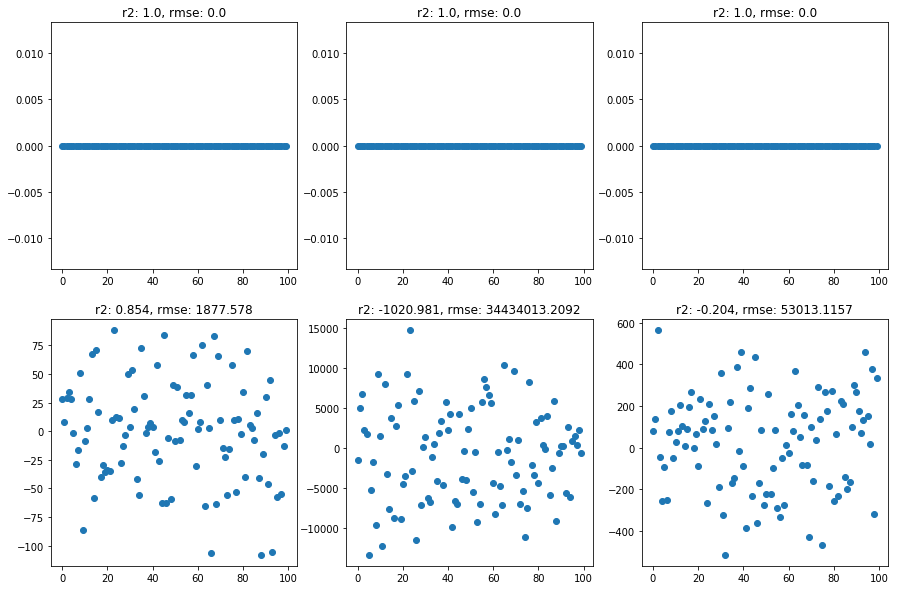

In [755]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

X, y, coef = make_regression(n_features=1, coef=True, bias=10)
reg = Regression()
reg.fit(X, y)
ax[0, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(n_features=2, coef=True, bias=0)
reg = Regression()
reg.fit(X, y)
ax[0, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=10)
reg = Regression()
reg.fit(X, y)
ax[0, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100)
reg = Regression()
reg.fit(X, y)
ax[1, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=200, bias=20, noise=5)
reg = Regression()
reg.fit(X, y)
ax[1, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100, bias=40, noise=100)
reg = Regression()
reg.fit(X, y)
ax[1, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")
plt.show()

Попробуйте теперь две вещи:
1. Найти тот момент, когда линейная регрессия ломается и коэффициенты перестают быть похожими на те, что надо
2. Если Вы знакомы с sklearn, то попробуйте сравнить свой результат с их реализацией

Померьте, как толго считается решение таким образом

```python
%timeit <ваше решение выше>
```

In [594]:
X, y, coef = make_regression(10000, coef=True, n_features=10)
%timeit reg = Regression().fit(X, y)

553 µs ± 49.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


А теперь попробуем добавить нулевой вектор

In [596]:
X, y, coef = make_regression(coef=True, n_features=10)
X_z = np.concatenate((np.zeros((X.shape[0], 1)), X), axis=1)
Regression().fit(X_z, y)

LinAlgError: Singular matrix

Что у вас получилось?

In [756]:
class PinvRegression(Regression):

    def fit(self, X, y, bias=True) -> 'PinvRegression':
        """
        Ordinary least squares regression with pseudoinvariant matrix

        :param X: Матрица признаков
        :param y: Целевая переменная
        :param bias: Добавялять ли спереди X вектор из единиц

        :return: Посчитанные аналитически веса
        """
        ### Ваш код тут ###
        # Добавьте bias к X
        X_: np.ndarray = None
        # Посчитайте w используя псевдообратную матрицу
        w: np.ndarray = None
        ### Конец вашего кода ###

        if X.ndim > 1:
            self.coef_ = w[1:]
            self.bias = w[0].item()
        else:
            self.coef_ = w[1].items()
            self.bias = w[0].item()
        return self

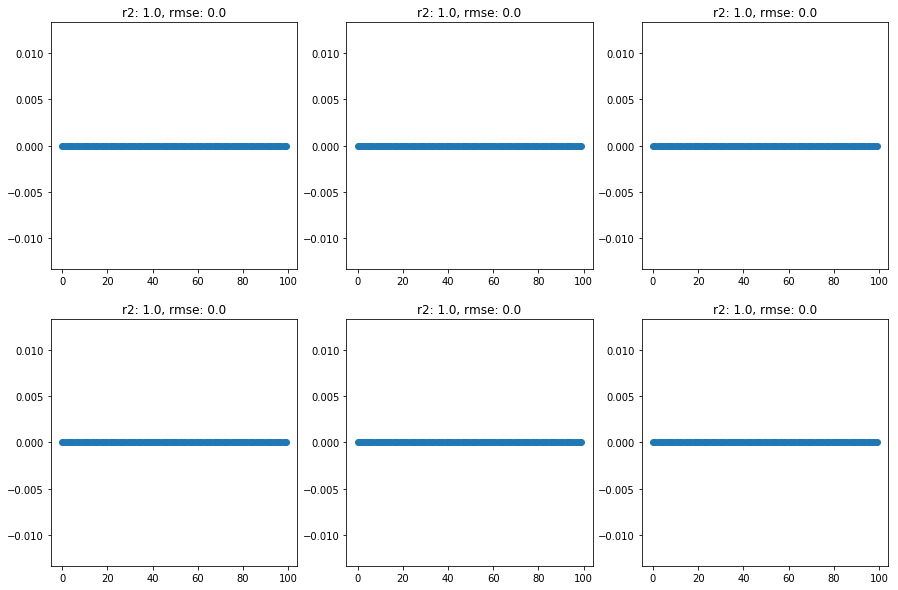

In [757]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

X, y, coef = make_regression(n_features=1, coef=True, bias=10)
reg = PinvRegression()
reg.fit(X, y)
ax[0, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(n_features=2, coef=True, bias=0)
reg = PinvRegression()
reg.fit(X, y)
ax[0, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=10)
reg = PinvRegression()
reg.fit(X, y)
ax[0, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100)
reg = PinvRegression()
reg.fit(X, y)
ax[1, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=200, bias=20, noise=5)
reg = PinvRegression()
reg.fit(X, y)
ax[1, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100, bias=40, noise=100)
reg = PinvRegression()
reg.fit(X, y)
ax[1, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")
plt.show()

In [609]:
X, y, coef = make_regression(10000, coef=True, n_features=10)
%timeit PinvRegression().fit(X, y)

601 µs ± 69.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Насколько изменилась скорость выполнения?

### Приближенное решение

Приближенное решение 

$$w^0 = 0$$

$$w^t = w^{t-1} - \eta_t \nabla Q(w^{t-1}, X)$$

$$||w^t - w^{t-1}|| < \epsilon$$

- $\eta_t$ - шаг минимизации (можно взять как $\frac{\eta_0}{t}$)

#### $Q$ через градинентный спуск

Задча стоит так: $Q(w, X) = \frac{1}{l}||Xw-y||^2 \rightarrow \underset{w}{min}$

Тогда, если взять производную от Q, то получим следующее:

$\nabla Q(w, X) = \frac{2}{l}X^T(Xw - y)$

- $l$ - количество примеров (наблюдений)

__Реализуйте метод градинтного спуска__

In [231]:
X, y, coef = make_regression(10000, n_features=10, coef=True)

In [758]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

class GDRegression(Regression):

    def __init__(self, step: int=1, max_iter: int=100,
                 tol: float=0.01, verbose: float=1.):
        """
        :param step: Шаг градиентного спуска
        :param max_iter: Максимальное количество итераций
        :param tol: Допустиная разность ||w^t - w^{t-1}||
        :param verbose: Запускать с графиками и информацией или тихо
        """
        super().__init__()
        self.step: int = step
        self.max_iter: int = max_iter
        self.tol: float = tol
        self._losses: List[float] = []
        self.verbose: float = verbose

    def _update_weights(self, X: np.ndarray, y: np.ndarray,
                        w: np.ndarray, b: float,
                        t: int) -> (np.ndarray, np.ndarray):
        """
        Метод для обновления весов модели

        :param X: Матрица признаков
        :param y: Вектор целевой переменной
        :param w: Текущий вектор весов
        :param b: Текущее значение bias
        :param t: Текущая итерация
        """

        ### Ваш код тут ###
        # Сохраните количество примеров в X
        l: int = None
        # Посчитайте Q и доавьте это значение в self._losses
        Q: np.float = None
        self._losses.append(Q)
        # Посчитайте гратинты
        dw = None
        db = None
        # Обновите веса
        w_new = None
        b_new = None

        ### Конец вашего кода ###

        return w_new, b_new

    def fit(self, X: np.ndarray, y: np.ndarray, **kwargs) -> 'GDRegression':
        """
        :param X: Матрица признаков
        :param y: Целевая переменная

        :return:
        """
        ### Ваш код тут ###
        # Инициализируйте васа нулями или загрузите веса, если модель уже обучалась раньше
        w_prev: np.ndarray = None
        b_prev: float = None
            
        self.coef_ = w_prev
        self.bias = b_prev

        for t in range(1, self.max_iter):
            # Вызываем метод обновления весов с нужными аргументами
            w, b = None

            # Поставьте критерий остановки
            if None:
                w_prev = w
                b_prev = b
                break
            w_prev = w
            b_prev = b
        self.coef_ = w_prev
        self.bias = b_prev

        ### Конец вашего кода ###
        return self

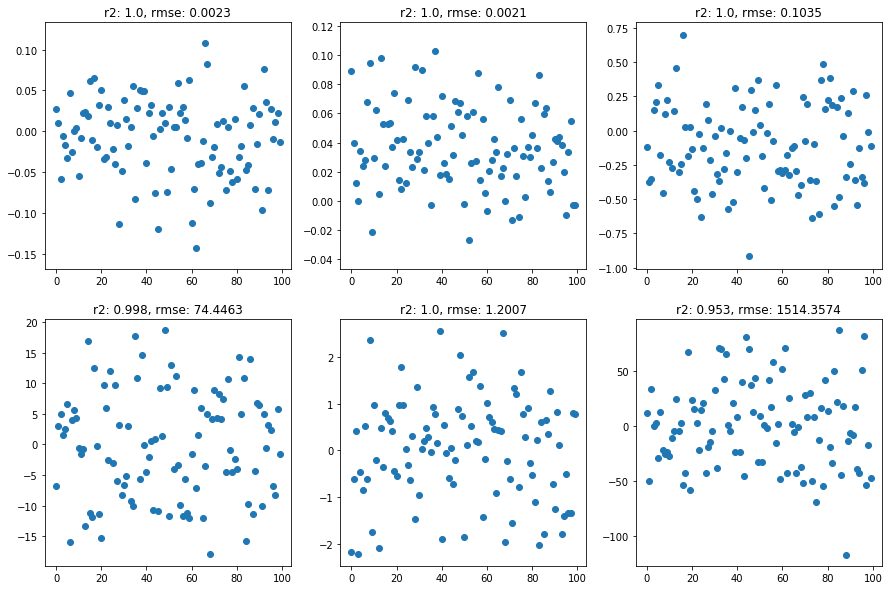

In [759]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

X, y, coef = make_regression(n_features=1, coef=True, bias=10)
reg = GDRegression()
reg.fit(X, y)
ax[0, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(n_features=2, coef=True, bias=0)
reg = GDRegression()
reg.fit(X, y)
ax[0, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=10)
reg = GDRegression()
reg.fit(X, y)
ax[0, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100)
reg = GDRegression()
reg.fit(X, y)
ax[1, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=200, bias=20, noise=5)
reg = GDRegression()
reg.fit(X, y)
ax[1, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100, bias=40, noise=100)
reg = GDRegression()
reg.fit(X, y)
ax[1, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")
plt.show()

Попробуйте поиграть с количеством и информативностью признаков

Как это сказывается на разнице истинных коэффициентов?

In [746]:
X, y, coef = make_regression(10000, coef=True, n_features=10)
%timeit GDRegression(max_iter=10000, step=0.9, tol=0.0000001, verbose=0).fit(X, y)

353 ms ± 22.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Какой результат у Вас получился? (Note: $\mu s$ - наносекунды, $ms$ - милисекунды)

Градиентный спуск быстрее или медленнее?

Почему так получилось? 

В каком случае медленный градиентный спуск будет предпочтительнее (Если забыть остальные методы оптимизации)?

Что если начать добавлять количество наблюдений?

<details>
    <summary>Спойлер</summary>
    <p>Градиентный спуск действительно очень медленный, но стохастический градиентный спуск должен нас выручить</p>
</details>

### Стохастический градиентный спуск

Приближенное решение 

$$w^0 = 0$$

$$w^t = w^{t-1} - \eta_t \nabla Q(w^{t-1}, X_{i})$$

$$||w^t - w^{t-1}|| < \epsilon$$

- $\eta_t$ - шаг минимизации (можно взять как $\frac{\eta_0}{t}$)

Задча стоит так: $Q(w, X) = \frac{1}{l}||Xw-y||^2 \rightarrow \underset{w}{min}$

Тогда, если взять производную от Q, то получим следующее:

$\nabla Q(w, X_{i}) = \frac{2}{l}X_{i}^T(X_{i}w - y_i)$

- $l$ - количество примеров (наблюдений)

__Реализуйте метод стохастического градинтного спуска__

<details>
    <summary>Подсказка по выбору индексов</summary>
    <p>np.random.choice</p>
</details>

In [1035]:
class SGDRegression(GDRegression):
    def __init__(self, batch_size=1, *args, **kwargs):
        """
        :param step: Шаг градиентного спуска
        :param max_iter: Максимальное количество итераций
        :param tol: Допустиная разность ||w^t - w^{t-1}||
        :param verbose: Запускать с графиками и информацией или тихо
        """
        super().__init__(*args, **kwargs)
        self.batch_size: int = batch_size

    def _update_weights(self, X: np.ndarray, y: np.ndarray,
                        w: np.ndarray, b: float,
                        t: int) -> (np.ndarray, np.ndarray):
        #### Ваш код тут ####

        # Выберите случайный набор значений размера self.batch_size
        idx = None
        x_i = None
        y_i = None

        if self.batch_size == 1:
            # Сделайте обновление весов для случая self.batch_size = 1
            dw = None
            db = None

            Q = None
            self._losses.append(Q)

            w_new = None
            b_new = None
        else:
            w_new, b_new = GDRegression._update_weights(self, x_i, y_i, w, b, t)
            
        return w_new, b_new

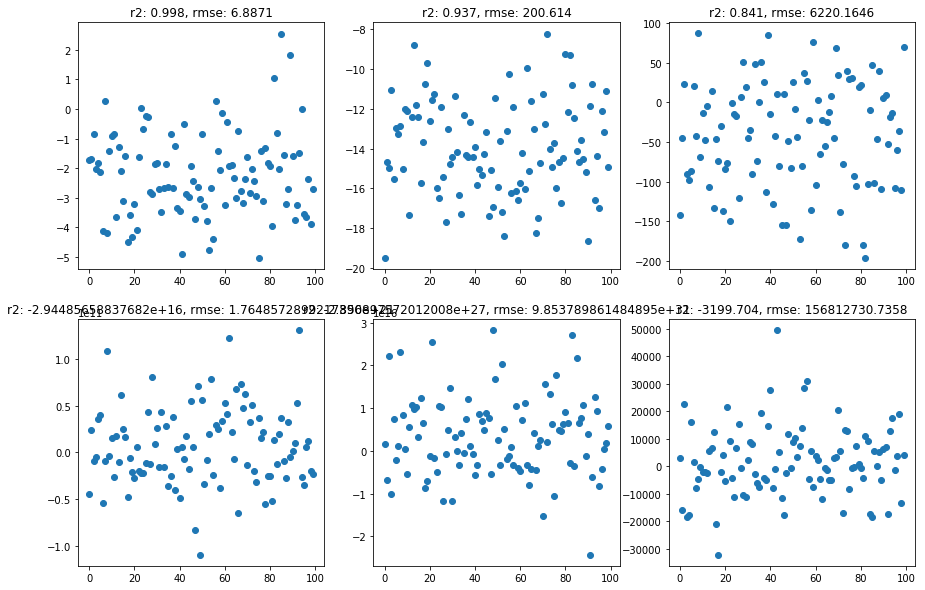

In [1036]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

X, y, coef = make_regression(n_features=1, coef=True, bias=10)
reg = SGDRegression()
reg.fit(X, y)
ax[0, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(n_features=2, coef=True, bias=0)
reg = SGDRegression()
reg.fit(X, y)
ax[0, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=10)
reg = SGDRegression()
reg.fit(X, y)
ax[0, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[0, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100)
reg = SGDRegression()
reg.fit(X, y)
ax[1, 0].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 0].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=200, bias=20, noise=5)
reg = SGDRegression()
reg.fit(X, y)
ax[1, 1].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 1].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")

X, y, coef = make_regression(coef=True, n_features=100, bias=40, noise=100)
reg = SGDRegression(batch_size=10)
reg.fit(X, y)
ax[1, 2].scatter(range(y.shape[0]), reg.predict(X) - y)
ax[1, 2].set_title(f"r2: {round(r2_score(y, reg.predict(X)), 3)}, "
                   f"rmse: {round(mean_squared_error(y, reg.predict(X)), 4)}")
plt.show()

In [1015]:
X, y, coef = make_regression(10000, coef=True, n_features=10)
%timeit SGDRegression(max_iter=10000, step=0.9, tol=0.0000001, verbose=0).fit(X, y)

434 ms ± 49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Бысрее ли работает SGD?

Как думаете, чем можно ускорить вычисления?

Почему, в некоторых случаях, SGD показывает очень плохие результаты?

### Классификация

Мб МНК снова пойдет?

In [764]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [822]:
class Classifier(Regression):

    def __init__(self, activation='sigmoid', threshold=0.5):
        super().__init__()
        self.activation = activation
        self.threshold = threshold
            
    def sigmoid(self, y):
        """
        Имплементация сигмойды по формуле \frac{1}{1 + \exp(-y)}
        """
        # Реализуйте сигмойду по формуле выше
        ### Ваш код тут ###
        return None
        ### Конец Вашего кода ###


    def predict_proba(self, X):
        # Вызовите предсказания регрессии
        ### Ваш код тут ###
        a = None
        # Примените сигмойду к предсказаниям регрессии
        if self.activation == 'sigmoid':
            pred = None
            ### Конец Вашего кода ###
        else:
            raise NotImplementedError(f'Activation {self.activation} is not implemented yet.')
        return pred
    
    def predict(self, X):
        # Посчитайте вероятности
        ### Ваш код тут ###
        prob = None
        # Посчитайте предсказания (Отсеките по порогу вероятностей)
        pred = None
        ### Конец Вашего кода ###
        return pred

In [1258]:
X, y = make_classification(100000, n_features=2, n_informative=2, n_redundant=0, n_classes=2)

In [1259]:
sum(y == 1), sum(y == 0)

(49983, 50017)

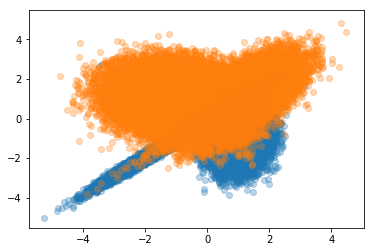

In [1272]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], alpha=0.3)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], alpha=0.3)

Попробуем снова, как сверху

In [1273]:
# Замените нули в y на -1
y_ = y.copy()
y_[y_ == 0] = -1

In [1274]:
# Обучите классификатор
clf = Classifier()
clf.fit(X, y_)
proba = clf.predict_proba(X)
pred = clf.predict(X)

In [1275]:
zeros_tp = X[(pred == 0) & (y == 0)]
ones_tp = X[(pred == 1) & (y == 1)]
ones_fp = X[(pred == 1) & (y == 0)]
zeros_fp = X[(pred == 0) & (y == 1)]

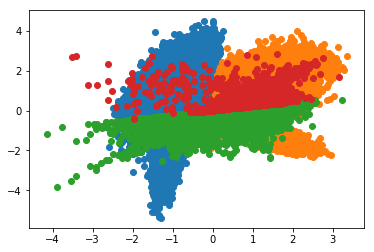

In [1276]:
plt.scatter(zeros_correct[:, 0], zeros_correct[:, 1], alpha=1)
plt.scatter(ones_correct[:, 0], ones_correct[:, 1], alpha=1)
plt.scatter(zeros_fp[:, 0], zeros_fp[:, 1], alpha=1)
plt.scatter(ones_fp[:, 0], ones_fp[:, 1], alpha=1)

Вроде бы все работает, но почему такое решение, опять же, не так часто встречается в использовании?

Приведите пример, когда этот классификатор ломается

In [1277]:
a_sign[a_sign == -1] = 0

In [1278]:
accuracy_score(y, pred > 0.5)

0.88535

In [1279]:
fp, tp, _ = roc_curve(y, pred)
fp_, tp_, _ = roc_curve(y, [0.5] * len(y))

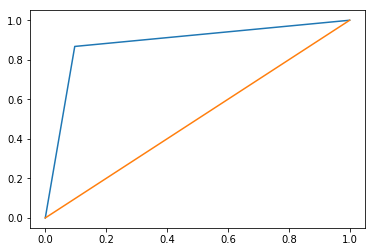

In [1280]:
plt.plot(fp, tp)
plt.plot(fp_, tp_)

In [1281]:
y

array([0, 0, 1, ..., 1, 0, 0])

#### Gradient descent для классификации

In [1282]:
class GDClassifier(GDRegression, Classifier):
    def __init__(self, step: int=1, max_iter: int=100,
                 tol: float=0.01, verbose: float=1.,
                 activation='sigmoid', threshold=0.5):
        """
        :param step: Шаг градиентного спуска
        :param max_iter: Максимальное количество итераций
        :param tol: Допустиная разность ||w^t - w^{t-1}||
        :param verbose: Запускать с графиками и информацией или тихо
        :param activation: Функция активации для предсказаний
        :param threshold: Порог для вероятностей модели
        """
        GDRegression.__init__(self, step=step, max_iter=max_iter, tol=tol, verbose=verbose)
        Classifier.__init__(self, activation=activation, threshold=threshold)
        

    def _update_weights(self, X: np.ndarray, y: np.ndarray,
                        w: np.ndarray, b: float,
                        t: int) -> (np.ndarray, np.ndarray):
        """
        Метод для обновления весов модели

        :param X: Матрица признаков
        :param y: Вектор целевой переменной (от 0 до 1)
        :param w: Текущий вектор весов
        :param b: Текущее значение bias
        :param t: Текущая итерация
        """

        ### Ваш код тут ###

        l: int = X.shape[0]
        # Посчитайте вероятности и функцию потерь и доавьте это значение cost в self._losses
        A = None
        # Cross entropy loss
        cost: np.float = None
        self._losses.append(cost)
        # Посчитайте градиенты
        dw = None
        db = None
        # Обновите веса
        w_new = None
        b_new = None

        ### Конец вашего кода ###

        return w_new, b_new
    
    def predict(self, X):
        return Classifier.predict(self, X)
    

In [1266]:
# Обучите классификатор
clf = GDClassifier()
clf.fit(X, y)
proba = clf.predict_proba(X)
pred = clf.predict(X)

In [932]:
clf.fit?

In [1267]:
roc_auc_score(y, proba)

0.9493124513405193

In [1268]:
zeros_tp = X[(pred == 0) & (y == 0)]
ones_tp = X[(pred == 1) & (y == 1)]
ones_fp = X[(pred == 1) & (y == 0)]
zeros_fp = X[(pred == 0) & (y == 1)]

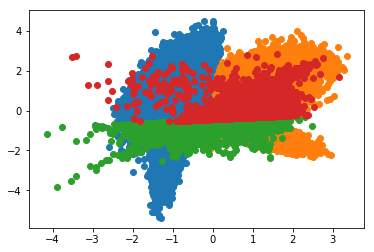

In [1269]:
plt.scatter(zeros_correct[:, 0], zeros_correct[:, 1], alpha=1)
plt.scatter(ones_correct[:, 0], ones_correct[:, 1], alpha=1)
plt.scatter(zeros_fp[:, 0], zeros_fp[:, 1], alpha=1)
plt.scatter(ones_fp[:, 0], ones_fp[:, 1], alpha=1)

In [1270]:
clf._losses[-1]

0.39630646728882096

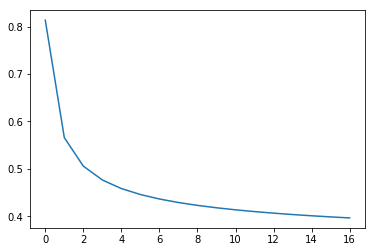

In [1271]:
plt.plot(clf._losses)

#### SGD classifier

In [1050]:
class SGDClassifier(GDClassifier):
    def __init__(self, step: int=1, max_iter: int=100,
                 tol: float=0.01, verbose: float=1.,
                 activation='sigmoid', threshold=0.5,
                 batch_size=1):
        GDClassifier.__init__(self, step=step, max_iter=max_iter, tol=tol,
                              verbose=verbose, activation=activation,
                              threshold=threshold)
        self.batch_size = batch_size

    def _update_weights(self, X: np.ndarray, y: np.ndarray,
                        w: np.ndarray, b: float,
                        t: int) -> (np.ndarray, np.ndarray):
        #### Ваш код тут ####

        # Выберите случайный набор значений размера self.batch_size
        idx = None
        x_i = None
        y_i = None

        if self.batch_size == 1:
            # Сделайте обновление весов для случая self.batch_size = 1
            a = None
            
            # Посчитайте cross entropy loss
            cost: np.float = None
            self._losses.append(cost)
            
            # Посчитайте градиенты
            dw = None
            db = None
            
            # Обновите веса
            w_new = None
            b_new = None
        else:
            w_new, b_new = GDClassifier._update_weights(self, x_i, y_i, w, b, t)
            
        return w_new, b_new

In [1260]:
# Обучите классификатор
clf = SGDClassifier(batch_size=100)
clf.fit(X, y)
proba = clf.predict_proba(X)
pred = clf.predict(X)

In [1261]:
roc_auc_score(y, proba)

0.9505813502872041

In [1262]:
Churikovzeros_tp = X[(pred == 0) & (y == 0)]
ones_tp = X[(pred == 1) & (y == 1)]
ones_fp = X[(pred == 1) & (y == 0)]
zeros_fp = X[(pred == 0) & (y == 1)]

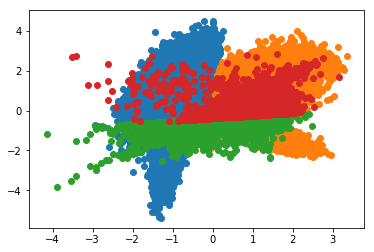

In [1263]:
plt.scatter(zeros_correct[:, 0], zeros_correct[:, 1], alpha=1)
plt.scatter(ones_correct[:, 0], ones_correct[:, 1], alpha=1)
plt.scatter(zeros_fp[:, 0], zeros_fp[:, 1], alpha=1)
plt.scatter(ones_fp[:, 0], ones_fp[:, 1], alpha=1)

In [1264]:
clf._losses[-1]

0.4456562330562715

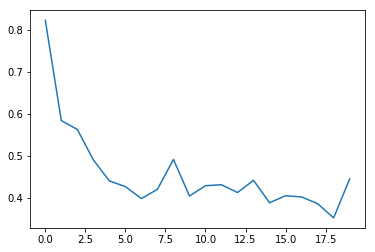

In [1265]:
plt.plot(clf._losses)

Попробуйте поиграться с batch_size.

Как меняется loss?

Какой вывод из этого можно сделать?

## Попробуем на реальных данных

### Регрессия

In [1155]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [1065]:
X, y = load_boston(return_X_y=True)

In [1067]:
X.shape, y.shape

((506, 13), (506,))

In [1069]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [1075]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [1073]:
ols_reg = Regression()
pinv_reg = PinvRegression()
gd_reg = GDRegression()
sgd_reg = SGDRegression()

In [1078]:
ols_reg.fit(x_train, y_train)
print(r2_score(y_test, ols_reg.predict(x_test)))
pinv_reg.fit(x_train, y_train)
print(r2_score(y_test, pinv_reg.predict(x_test)))
gd_reg.fit(x_train, y_train)
print(r2_score(y_test, gd_reg.predict(x_test)))
sgd_reg.fit(x_train, y_train)
print(r2_score(y_test, sgd_reg.predict(x_test)))

0.7262162868166524
0.7262162868176405


/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Почему так получилось?

Попробуйте объяснить, почему мы не можем использовать модели без предобработки данных

In [1083]:
from sklearn.preprocessing import StandardScaler

In [1084]:
scaler = StandardScaler()

In [1085]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [1173]:
ols_reg = Regression()
pinv_reg = PinvRegression()
gd_reg = GDRegression()
sgd_reg = SGDRegression(30)

In [1174]:
ols_reg.fit(x_train_sc, y_train)
print(r2_score(y_test, ols_reg.predict(x_test_sc)), mean_squared_error(y_test, ols_reg.predict(x_test_sc)))
pinv_reg.fit(x_train_sc, y_train)
print(r2_score(y_test, pinv_reg.predict(x_test_sc)), mean_squared_error(y_test, pinv_reg.predict(x_test_sc)))
gd_reg.fit(x_train_sc, y_train)
print(r2_score(y_test, gd_reg.predict(x_test_sc)), mean_squared_error(y_test, gd_reg.predict(x_test_sc)))
sgd_reg.fit(x_train_sc, y_train)
print(r2_score(y_test, sgd_reg.predict(x_test_sc)), mean_squared_error(y_test, sgd_reg.predict(x_test_sc)))

0.7262162868166406 25.602515673870553
0.7262162868166417 25.602515673870442
0.7242678792206995 25.784718389416174
-2.2927014899962006 307.91255084828947


Text(0.5,1,'Stochastic gradient descent loss')

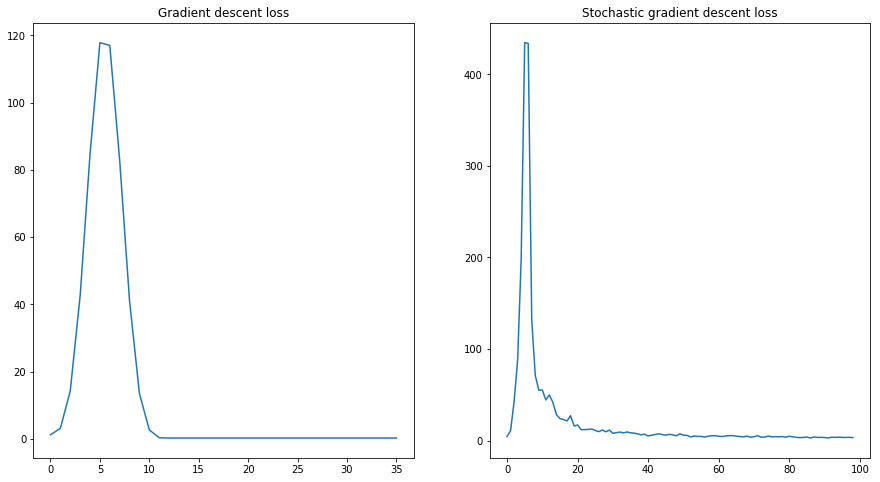

In [1175]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(gd_reg._losses)
ax[0].set_title('Gradient descent loss')
ax[1].plot(sgd_reg._losses)
ax[1].set_title('Stochastic gradient descent loss')

В этой части вы увидели, что линейные методы очень чувствительны к масштабу данных

Попробуйте поиграть с параметрами моделей и посмотреть на результаты.

### Классификация

In [1189]:
from sklearn.datasets import 
from sklearn.metrics import accuracy_score

In [1235]:
X, y = load_digits(return_X_y=True)

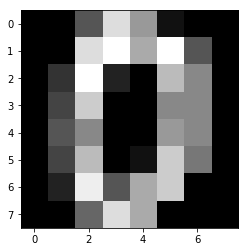

In [1236]:
plt.imshow(X[0].reshape(8, 8), cmap='gray')

In [1237]:
X.shape, y.shape

((1797, 64), (1797,))

In [1238]:
y = np.array([1 if yi == 0 else 0 for yi in y])

In [1239]:
X = X / 255.

In [1240]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [1241]:
gd_clf = GDClassifier()
sgd_clf = SGDClassifier()

In [1242]:
gd_clf.fit(x_train, y_train)
print(accuracy_score(y_test, gd_clf.predict(x_test)))
sgd_clf.fit(x_train, y_train)
print(accuracy_score(y_test, sgd_clf.predict(x_test)))

0.9088888888888889
0.9088888888888889


Text(0.5,1,'Stochastic gradient descent loss')

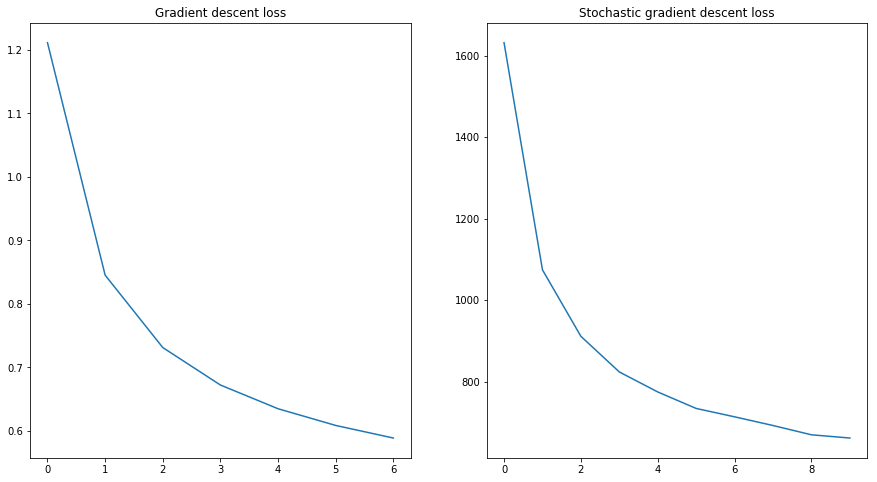

In [1243]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].plot(gd_clf._losses)
ax[0].set_title('Gradient descent loss')
ax[1].plot(sgd_clf._losses)
ax[1].set_title('Stochastic gradient descent loss')

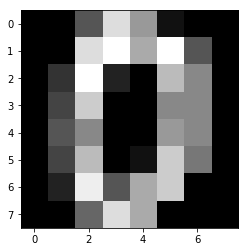

In [1256]:
plt.imshow(X[0].reshape(8, 8), cmap='gray')

In [1253]:
clf.predict_proba(X[:2])[0]

0.7500651663875351

Как-то так

На этом заканчивается задание по созданию своего мини scikit-learn.

Еще много чего можно добавить в наши модели, но уже эти реализации способны неплохо предсказывать цены за дом и определять цифры по фотографиям! 

И все это сделано Вами!

Поздравляю с завершением этого ноутбука.

Дальше можно попробоавть свои силы на классической задаче a.k.a. hello world в data science -- предсказание выживания на титанике.